C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


<Axes: >

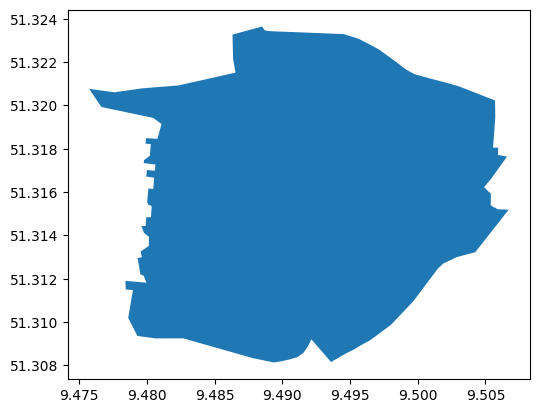

In [2]:
import osmnx as ox
import pandas as pd

place_name = "Kassel"
tags = {"postal_code": "34117"}

direct_search_method = ox.features_from_place(place_name, tags)
direct_search_method.plot()

In [3]:
direct_search_method

,,amenity,brand,brand:wikidata,brand:wikipedia,check_date,opening_hours,operator,operator:wikidata,operator:wikipedia,parcel_locker:type,...,ref,surveillance,website,geometry,nodes,boundary,ways,note,postal_code_level,type
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
node,2104168348,parcel_locker,DHL Packstation,Q1766703,de:Packstation,2022-03-05,24/7,DHL,Q489815,de:DHL,cabinet,...,101,outdoor,https://www.packstation.de/,POINT (9.50091 51.31964),NaN,NaN,NaN,NaN,NaN,NaN
relation,1189972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"POLYGON ((9.47574 51.32076, 9.47760 51.32061, ...","[[[924504417, 924504180, 2852866605, 285319139...",postal_code,"[79123023, 1214236282, 1214236283, 79123029, 7...",34117 Kassel,8,boundary


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\osmnx\_overpass.py:211: UserWarning: This area is 183 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


Germany GeoJSON data saved to c:\Users\hamud\Documents\Retoflow\Project_Filter\Retoflow_Filter\ZIP_Dict_Extractor_Valid\TestGround\V4\Germany_geojson_data.geojson


C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


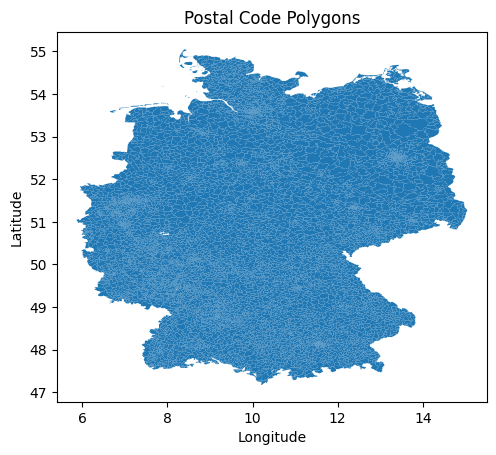

C:\Users\hamud\AppData\Roaming\Python\Python312\site-packages\jupyter_client\session.py:200: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)  # noqa


In [5]:
import osmnx as ox
import geojson
import pandas as pd
import os
from shapely.geometry import shape

def get_place_postal_code_polygons(place_name):
    """
    Fetches postal code polygons for the specified place using OSMnx.
    """
    # Fetch postal code polygons from OSMnx
    postal_code_polygons = ox.features_from_place(place_name, tags={"boundary": "postal_code"})
    
    # Create a DataFrame from the OSMnx features
    df = pd.DataFrame(postal_code_polygons).dropna(subset=['postal_code', 'geometry'])

    # Create a dictionary mapping postal codes to their respective geometries
    return {feature['postal_code']: feature['geometry'] for _, feature in df.iterrows()}

def format_geojson_data(data):
    """
    Formats data into GeoJSON format.
    """
    # Create GeoJSON features from the input data
    geojson_features = [geojson.Feature(geometry=polygon, properties={"postal_code": postal_code}) for postal_code, polygon in data.items()]
    
    # Create a GeoJSON FeatureCollection
    return geojson.FeatureCollection(geojson_features)

def save_geojson_to_file(geojson_data, file_name):
    """
    Saves GeoJSON data to a file in the same directory.
    """
    # Determine the script's directory
    script_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in locals() else os.getcwd()
    
    # Create the full path for the GeoJSON file
    file_path = os.path.join(script_dir, file_name)
    
    # Save the GeoJSON data to the file
    with open(file_path, 'w') as file:
        geojson.dump(geojson_data, file, indent=2)
    return file_path

# User input for the city or country name
place_input = input("Enter the city or country name: ")

# Example call for user input
place_postal_code_polygons = get_place_postal_code_polygons(place_input)
place_geojson_data = format_geojson_data(place_postal_code_polygons)

# Automatically create the filename in the same folder
file_name = f"{place_input}_geojson_data.geojson"

# Example call to save GeoJSON data to a file
saved_file_path = save_geojson_to_file(place_geojson_data, file_name)

print(f"{place_input} GeoJSON data saved to {saved_file_path}")

# Plot Postal Codes Data
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_geojson_data(geojson_data):
    """
    Plots GeoJSON data using GeoPandas.
    """
    # Load GeoJSON data using GeoPandas
    gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

    # Plot GeoDataFrame
    gdf.plot()

    # Display the plot
    plt.title("Postal Code Polygons")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Beispielaufruf der Plot-Funktion
plot_geojson_data(place_geojson_data)


In [1]:
place_postal_code_polygons

NameError: name 'place_postal_code_polygons' is not defined